In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn streamlit plotly streamlit-option-menu scikit-fuzzy pymongo python-Levenshtein 




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
%matplotlib inline
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
directory = "./data-source/input"

if os.path.exists(directory):
    
    print("Directory exists. Files:")
    for dirname, _, filenames in os.walk(directory):
        print("Directory:", dirname)
        for filename in filenames:
            print("File:", os.path.join(dirname, filename))
else:
    print("Directory does not exist.")


Directory exists. Files:
Directory: ./data-source/input
File: ./data-source/input\diabetes.csv


In [4]:
df = pd.read_csv("./data-source/input/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df = df.drop(["Pregnancies"],axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [8]:
df.dropna(subset=['Outcome'], inplace=True)

Text(0.5, 0.98, '0 = No , 1 = Yes')

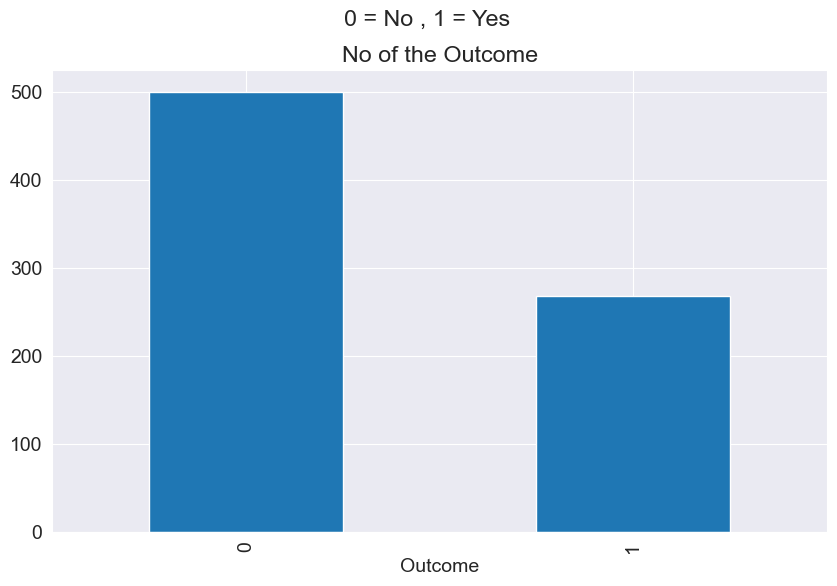

In [9]:
plt.title("No of the Outcome")
df['Outcome'].value_counts().plot(kind="bar")
plt.suptitle("0 = No , 1 = Yes")


### Evaluasi Ketidakseimbangan Kelas pada Dataset
Berdasarkan analisis kami, kami menemukan bahwa jumlah sampel dengan nilai 0 (No) secara signifikan lebih banyak daripada jumlah sampel dengan nilai 1 (Yes) dalam dataset kami. Hal ini menunjukkan adanya ketidakseimbangan kelas yang potensial dalam data kami. Sebagai langkah selanjutnya, kami akan menjelaskan mengapa kami melakukan reshaping dataset untuk menyeimbangkan kelas, dan kemudian membandingkan performa model menggunakan dataset dalam kondisi ketidakseimbangan dan dataset yang telah direshaping.

### Alasan untuk Reshaping Dataset
Ketidakseimbangan kelas dalam dataset kami dapat menghasilkan bias dalam evaluasi dan perhitungan model machine learning. Karena jumlah sampel kelas 0 (No) secara signifikan lebih besar, model cenderung lebih baik dalam memprediksi kelas mayoritas (0) daripada kelas minoritas (1). Hal ini dapat mengakibatkan evaluasi model yang tidak akurat dan ketidakmampuan untuk mendeteksi pola atau sinyal penting dalam kelas minoritas.

Untuk mengatasi masalah ini, kami akan melakukan reshaping dataset untuk menyeimbangkan kelas. Dengan demikian, model machine learning kami akan memiliki jumlah sampel yang seimbang untuk setiap kelas, memungkinkan evaluasi yang lebih adil dan akurat terhadap kelas minoritas.

### Langkah Selanjutnya
Sebelum melakukan reshaping dataset, kami akan menggunakan dataset dalam kondisi ketidakseimbangan untuk membandingkannya dengan versi yang seimbang. Kami akan memperhatikan perbedaan dalam performa model dan evaluasi untuk memastikan efektivitas langkah reshaping yang kami lakukan.

Setelah itu, kami akan melanjutkan dengan reshaping dataset dan melanjutkan analisis lanjutan menggunakan dataset yang seimbang.

### Evaluasi Hipotesis
Untuk memverifikasi hipotesis kami, kami akan melakukan analisis lebih lanjut dan menghitung rasio antara jumlah sampel dengan nilai 0 (No) dan jumlah sampel dengan nilai 1 (Yes) dalam kedua versi dataset. Jika rasio ini menunjukkan ketidakseimbangan kelas yang signifikan pada dataset awal, dan setelah reshaping dataset, kami akan membandingkan performa model untuk memverifikasi bahwa penyeimbangan kelas telah meningkatkan evaluasi model.

In [10]:
input_cols = df[[ "Glucose","BloodPressure", "SkinThickness", "Insulin" , "BMI" , "DiabetesPedigreeFunction" , "Age" ]] 
target_cols = df["Outcome"]

In [11]:
target_cols.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

For Training

In [12]:

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(input_cols, target_cols, test_size=0.2, random_state=42)


Preprocess the data as needed, including handling missing values,encoding categorical variables, scaling numerical input column , etc

In [13]:
#Handle missing values if any
input_cols.fillna(input_cols.mean(), inplace=True)

#Scale Numerical Input Column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
input_cols_scaled = scaler.fit_transform(input_cols)

C:\Users\wahyu\AppData\Local\Temp\ipykernel_19404\3501184005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_cols.fillna(input_cols.mean(), inplace=True)


In [14]:
# Import Tree Decision from Sklearn Library as our model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with hyperparameters
model = DecisionTreeClassifier(max_depth=2,random_state=42)


In [15]:
# # Menyimpan hasil evaluasi terbaik
# best_score = 0
# best_max_leaf_nodes = 0

# # Mencoba beberapa nilai untuk max_leaf_nodes
# for max_leaf_nodes in range(5, 21):
#     model.max_leaf_nodes = max_leaf_nodes
    
#     # Cross-validation scores
#     cv_scores = cross_val_score(model, input_cols, target_cols, cv=5)
#     mean_cv_score = np.mean(cv_scores)
    
#     # Menyimpan nilai terbaik
#     if mean_cv_score > best_score:
#         best_score = mean_cv_score
#         best_max_leaf_nodes = max_leaf_nodes

In [16]:
# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
# Lets Evaluate the decision Tree using accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

train_preds = model.predict(X_train)

# Make predictions on the validation data
val_preds = model.predict(X_val)

# Calculate accuracy for training and validation
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy= accuracy_score(y_val, val_preds)

# Cross-validation scores
cv_scores = cross_val_score(model, input_cols, target_cols, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", mean_cv_score)


# Calculate precision
precision = precision_score(y_val, val_preds)

# Calculate recall
recall = recall_score(y_val, val_preds)

# Calculate F1-score
f1 = f1_score(y_val, val_preds)

# Calculate ROC-AUC score (if applicable for binary classification)
roc_auc = roc_auc_score(y_val, val_preds)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

cm = confusion_matrix(y_val, val_preds)
print("confusion_matrix")
print(cm)

Mean Cross-Validation Score: 0.7370087428910959
Training Accuracy: 0.7719869706840391
Validation Accuracy: 0.7727272727272727
Precision: 0.7272727272727273
Recall: 0.5818181818181818
F1-score: 0.6464646464646465
ROC-AUC Score: 0.7303030303030303
confusion_matrix
[[87 12]
 [23 32]]


In [18]:
train_preds
pd.Series.value_counts(train_preds)

0    451
1    163
Name: count, dtype: int64

In [19]:
import pandas as pd

# Calculate value counts for the validation set
val_counts = pd.Series(y_val).value_counts()

# Print the value counts
print("Validation Set Value Counts:")
print(val_counts)


Validation Set Value Counts:
Outcome
0    99
1    55
Name: count, dtype: int64


In [20]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# If you haven't already imported pandas, make sure to do so at the beginning of your script or notebook

# Filter the DataFrame for samples where "Glucose" is less than or equal to 150
glucose_150_or_less = df[df["Glucose"] <= 127.5]

# Now, glucose_150_or_less contains the subset of samples where "Glucose" is less than or equal to 150

# Access the labels (Outcome) associated with the filtered samples
filtered_labels = glucose_150_or_less["Outcome"].value_counts()

# Now, filtered_labels contains the labels corresponding to the filtered samples


print(filtered_labels[0] )
print(filtered_labels[1] )


391
94


Lets Visualization the Tree

In [21]:
model.classes_

array([0, 1], dtype=int64)

[Text(0.5, 0.8333333333333334, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.25, 0.5, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = 0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.454\nsamples = 169\nvalue = [110, 59]\nclass = 0'),
 Text(0.75, 0.5, 'BMI <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]\nclass = 1'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.429\nsamples = 61\nvalue = [42, 19]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.4\nsamples = 163\nvalue = [45, 118]\nclass = 1')]

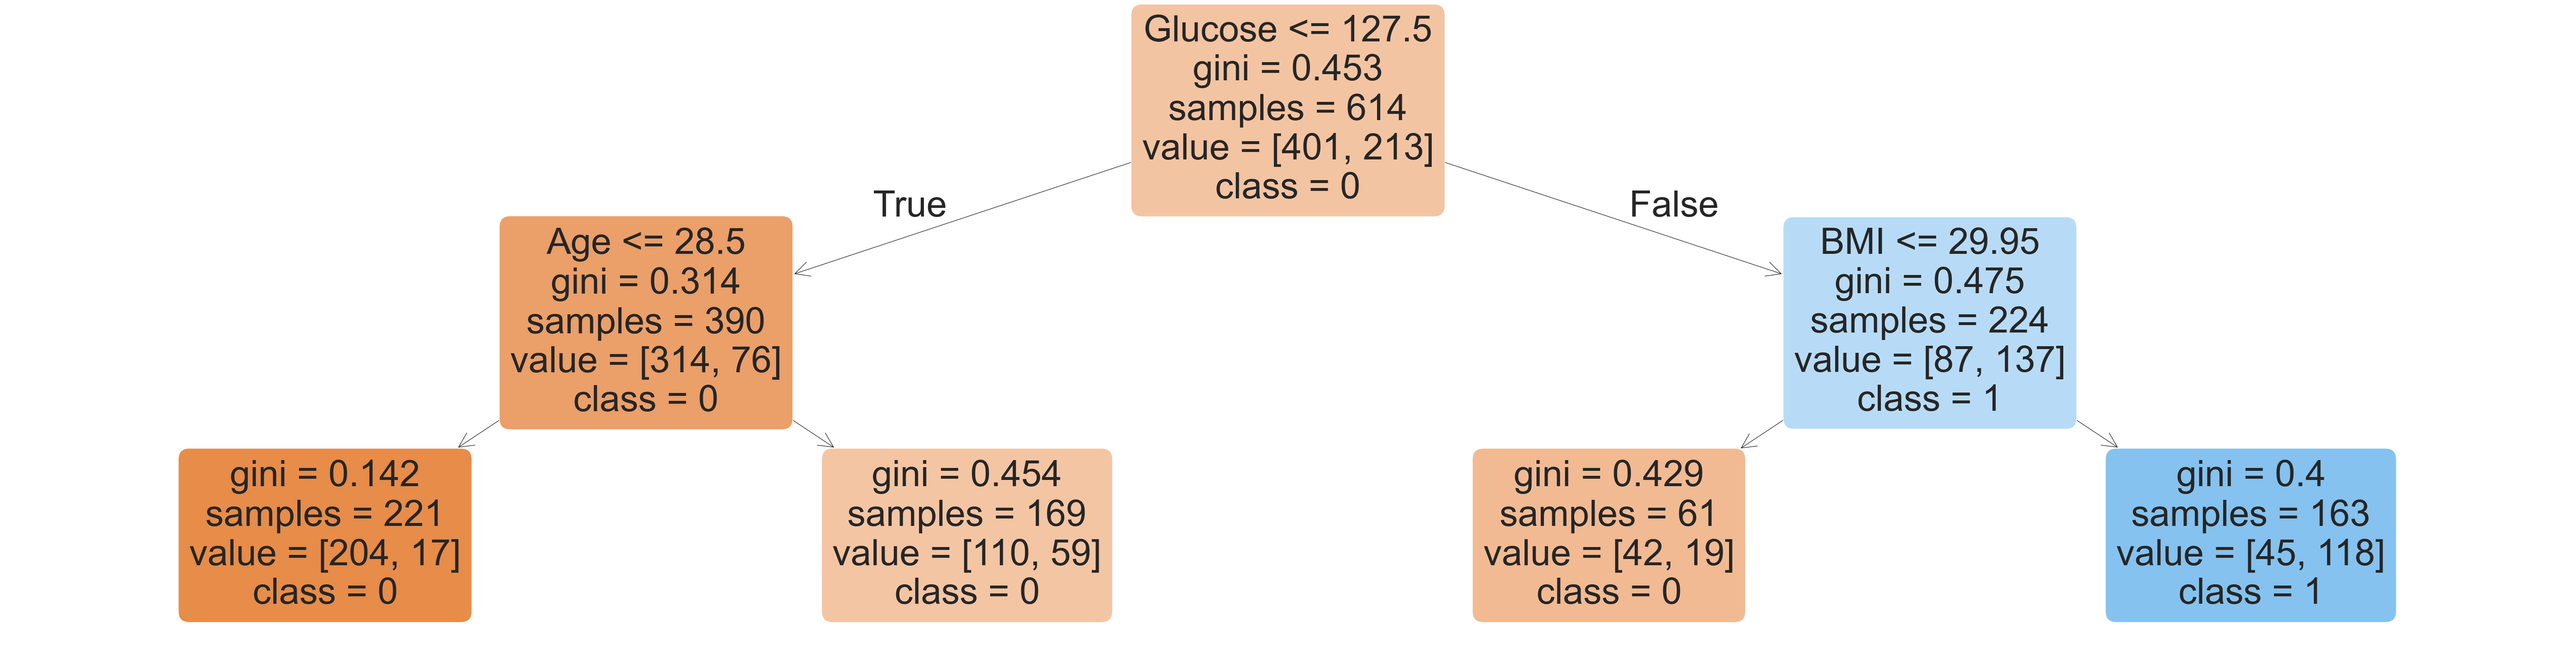

In [22]:
from sklearn.tree import plot_tree, export_text

# Convert integer class labels to strings
class_names = [str(label) for label in model.classes_]


plt.figure(figsize=(80, 20))
plot_tree(model , feature_names=X_train.columns, max_depth=3, filled=True , rounded=True , class_names=class_names)

In [23]:
model.tree_.max_depth


2

In [24]:
tree_text = export_text(model , feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- class: 1



In [25]:
model.feature_importances_

array([0.62785055, 0.        , 0.        , 0.        , 0.19186927,
       0.        , 0.18028018])

### Lets Build Random Forest for the imbalance Data 

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_imba = RandomForestClassifier(n_jobs=1 , random_state=42)

In [27]:
%%time
model_imba.fit(X_train , y_train)

CPU times: total: 312 ms
Wall time: 305 ms


RandomForestClassifier(n_jobs=1, random_state=42)

In [28]:
model_imba.score(X_train, y_train)

1.0

In [29]:
model_imba.score(X_val , y_val)

0.7597402597402597

Berdasarkan Training and Validation score diatas nilai training jauh lebih besar daripada validation , ini menandakan bahwa dataset kita itu "Overfitting"

In [30]:
train_prob_imba = model_imba.predict_proba(X_train)
train_prob_imba

array([[0.98, 0.02],
       [0.16, 0.84],
       [0.87, 0.13],
       ...,
       [0.17, 0.83],
       [0.18, 0.82],
       [0.95, 0.05]])

In [31]:
model_imba.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'BMI <= 34.05\ngini = 0.446\nsamples = 384\nvalue = [408, 206]\nclass = 0'),
 Text(0.25, 0.625, 'Age <= 42.5\ngini = 0.35\nsamples = 240\nvalue = [304, 89]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'DiabetesPedigreeFunction <= 1.16\ngini = 0.242\nsamples = 195\nvalue = [275, 45]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 62.0\ngini = 0.479\nsamples = 45\nvalue = [29, 44]\nclass = 1'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Age <= 30.5\ngini = 0.498\nsamples = 144\nvalue = [104, 117]\nclass = 1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'BloodPressure <= 37.0\ngini = 0.452\nsamples = 76\nvalue = [74, 39]\nclass = 0'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'DiabetesPedigreeFunction <= 0.27\ngini = 0.401\nsamples = 68\nvalue = [30, 78]\nclass = 1

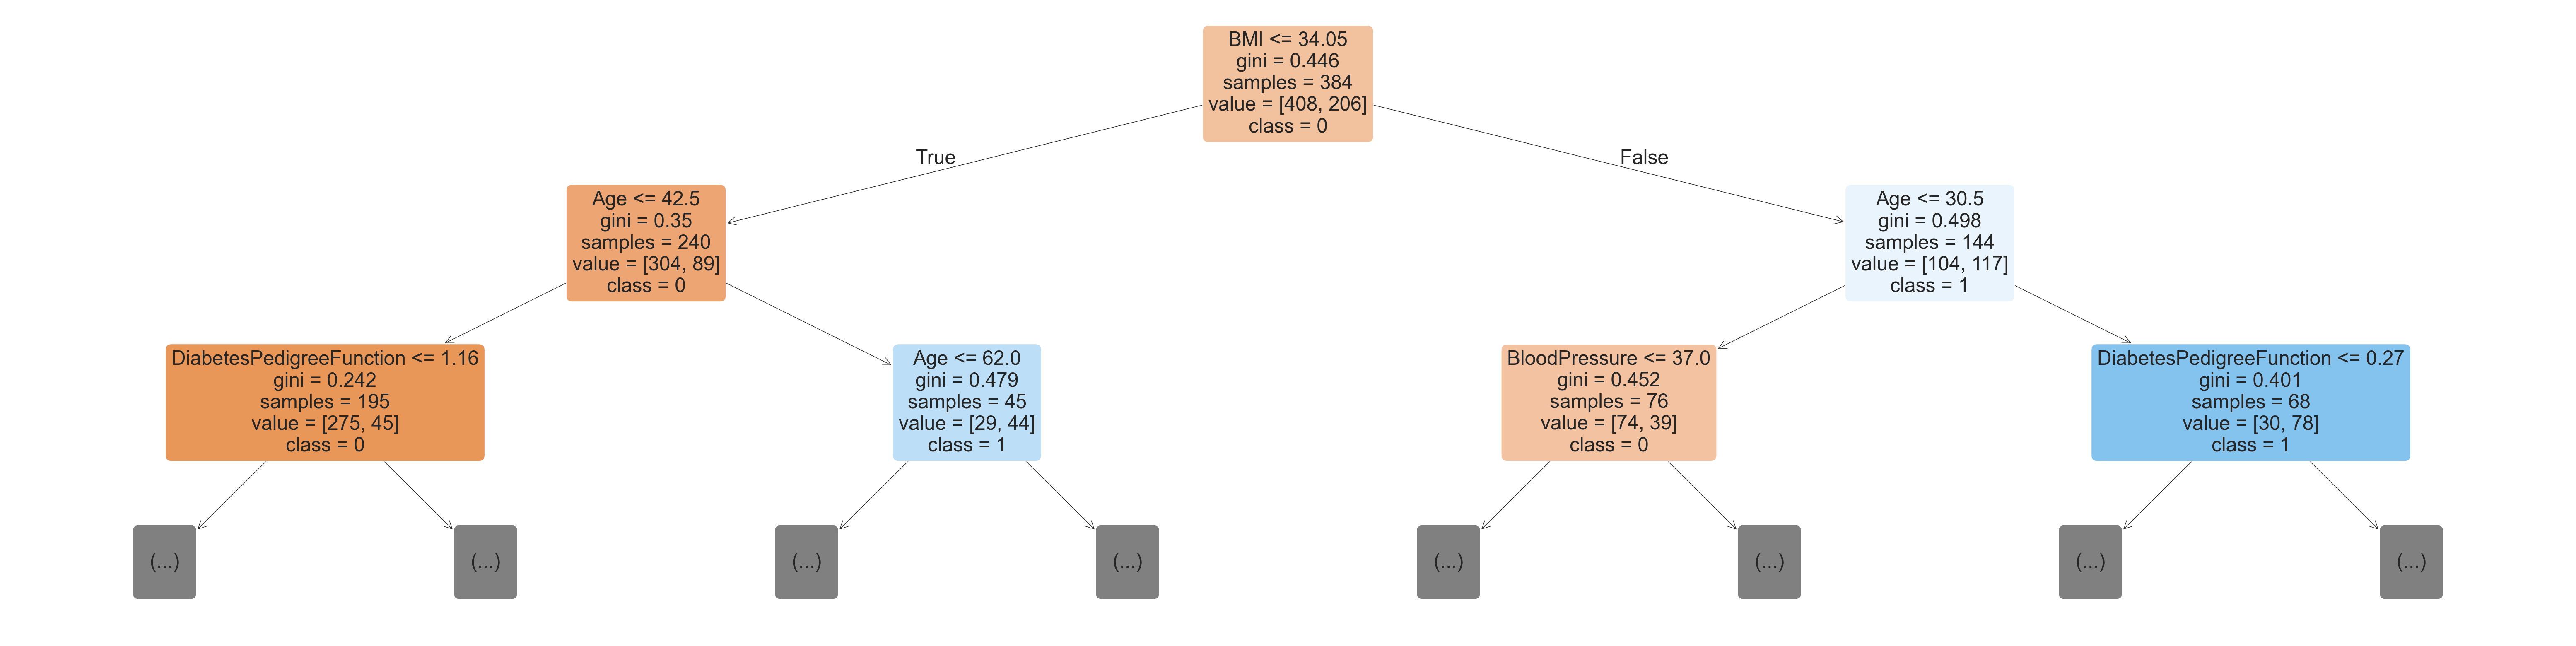

In [32]:
plt.figure(figsize=(80,20))
plot_tree(model_imba.estimators_[20], max_depth=2 , feature_names=X_train.columns , filled=True , rounded=True , class_names=class_names)

In [33]:
len(model_imba.estimators_)

100

In [34]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : model_imba.feature_importances_
}).sort_values('importance' , ascending=True)

In [35]:
importance_df.head()

,feature,importance
2,SkinThickness,0.070931
3,Insulin,0.076203
1,BloodPressure,0.099268
5,DiabetesPedigreeFunction,0.137007
6,Age,0.158925


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

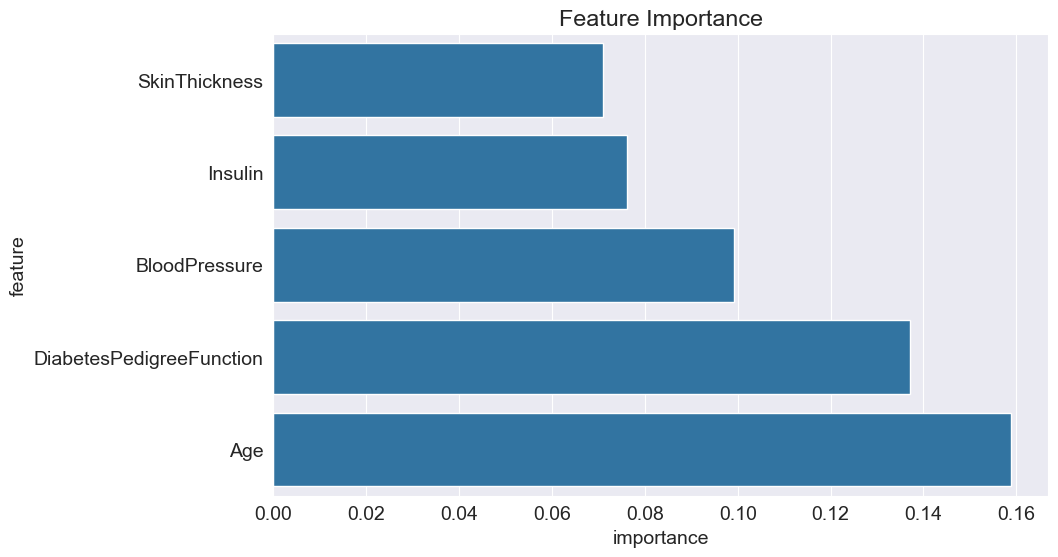

In [36]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(), x='importance' , y="feature")

In [37]:
base_model_imba = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)


In [38]:
base_train_accuracy = base_model_imba.score(X_train , y_train)
base_val_accuracy = base_model_imba.score(X_val , y_val)

In [39]:
base_acc_imba = base_train_accuracy , base_val_accuracy
base_acc_imba

(1.0, 0.7597402597402597)

In [40]:
def test_params_imba(**params):
    model = RandomForestClassifier(random_state=42 , n_jobs=-1 , **params).fit(X_train , y_train)
    return model.score(X_train , y_train), model.score(X_val , y_val) 

In [41]:
test_params_imba(max_depth = 2)

(0.7768729641693811, 0.7727272727272727)

In [42]:
test_params_imba(max_leaf_nodes = 2 ** 5)

(0.9136807817589576, 0.7727272727272727)

In [43]:
test_params_imba(max_features = 'sqrt')

(1.0, 0.7597402597402597)

In [44]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat model RandomForestClassifier
model_RF_imba = RandomForestClassifier(random_state=42, n_jobs=-1)

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=model_RF_imba, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian grid
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Cetak akurasi terbaik
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.7850326536052246


In [45]:
model_RF_imba = RandomForestClassifier(max_features='sqrt', random_state=42 ,
                                       min_samples_leaf=2, n_jobs=-1, 
                                       min_samples_split=2 ,
                                       n_estimators=100 , max_depth=8)

In [46]:
model_RF_imba.fit(X_train , y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_jobs=-1,
                       random_state=42)

In [47]:
model_RF_imba.score(X_train , y_train) , model_RF_imba.score(X_val , y_val )

(0.9429967426710097, 0.7467532467532467)

Training Accuracy: 0.9429967426710097
Validation Accuracy: 0.7467532467532467
Training Precision: 0.9540816326530612
Validation Precision: 0.6333333333333333
Training Recall: 0.8779342723004695
Validation Recall: 0.6909090909090909
Training F1-score: 0.9144254278728606
Validation F1-score: 0.6608695652173913
Training ROC-AUC Score: 0.9277451910130776
Validation ROC-AUC Score: 0.7343434343434343
Mean Cross-Validation Score: 0.7638286620835536
Training Confusion Matrix:
[[392   9]
 [ 26 187]]
Validation Confusion Matrix:
[[77 22]
 [17 38]]


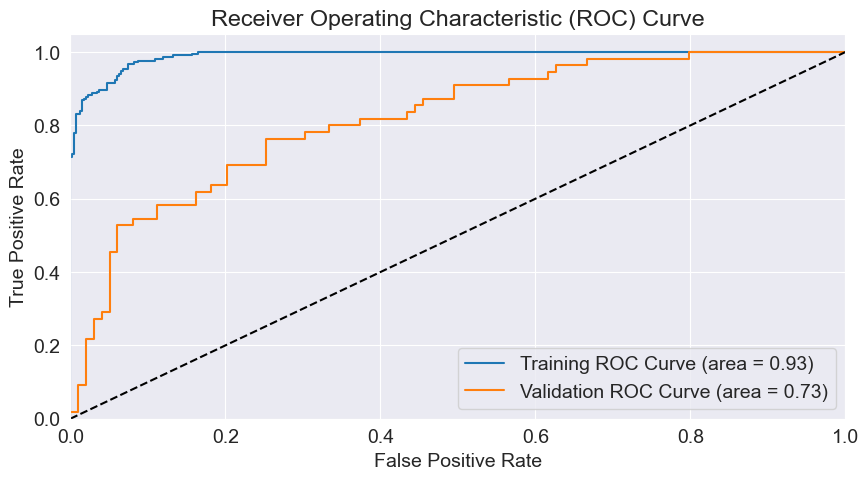

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Misalkan X_train, X_val, y_train, y_val sudah didefinisikan
# Misalkan model_RF_imba adalah model RandomForest yang sudah dilatih

# Prediksi pada training dan validation set
train_preds_imba = model_RF_imba.predict(X_train)
val_preds_imba = model_RF_imba.predict(X_val)

# Akurasi
train_accuracy_imba = accuracy_score(y_train, train_preds_imba)
val_accuracy_imba = accuracy_score(y_val, val_preds_imba)

# Cross-validation score
folds = 10
kf = KFold(n_splits=folds, shuffle=True, random_state=42)
cv_scores_imba = cross_val_score(model_RF_imba, X_train, y_train, cv=kf)
mean_cv_score_imba = np.mean(cv_scores_imba)

# Precision, Recall, F1-score, ROC-AUC
train_precision_imba = precision_score(y_train, train_preds_imba)
val_precision_imba = precision_score(y_val, val_preds_imba)

train_recall_imba = recall_score(y_train, train_preds_imba)
val_recall_imba = recall_score(y_val, val_preds_imba)

train_f1_imba = f1_score(y_train, train_preds_imba)
val_f1_imba = f1_score(y_val, val_preds_imba)

train_roc_auc_imba = roc_auc_score(y_train, train_preds_imba)
val_roc_auc_imba = roc_auc_score(y_val, val_preds_imba)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy_imba)
print("Validation Accuracy:", val_accuracy_imba)
print("Training Precision:", train_precision_imba)
print("Validation Precision:", val_precision_imba)
print("Training Recall:", train_recall_imba)
print("Validation Recall:", val_recall_imba)
print("Training F1-score:", train_f1_imba)
print("Validation F1-score:", val_f1_imba)
print("Training ROC-AUC Score:", train_roc_auc_imba)
print("Validation ROC-AUC Score:", val_roc_auc_imba)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", mean_cv_score_imba)

# Confusion matrix
train_cm_imba = confusion_matrix(y_train, train_preds_imba)
val_cm_imba = confusion_matrix(y_val, val_preds_imba)

print("Training Confusion Matrix:")
print(train_cm_imba)
print("Validation Confusion Matrix:")
print(val_cm_imba)

# Plot ROC curve
train_probs = model_RF_imba.predict_proba(X_train)[:, 1]
val_probs = model_RF_imba.predict_proba(X_val)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
val_fpr, val_tpr, _ = roc_curve(y_val, val_probs)

plt.figure(figsize=(10, 5))
plt.plot(train_fpr, train_tpr, label='Training ROC Curve (area = %0.2f)' % train_roc_auc_imba)
plt.plot(val_fpr, val_tpr, label='Validation ROC Curve (area = %0.2f)' % val_roc_auc_imba)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.457\nsamples = 390\nvalue = [397, 217]\nclass = 0'),
 Text(0.25, 0.625, 'BMI <= 37.7\ngini = 0.315\nsamples = 190\nvalue = [238, 58]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BloodPressure <= 12.0\ngini = 0.204\nsamples = 151\nvalue = [207, 27]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Insulin <= 16.0\ngini = 0.5\nsamples = 39\nvalue = [31, 31]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Glucose <= 94.5\ngini = 0.5\nsamples = 200\nvalue = [159, 159]\nclass = 0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SkinThickness <= 40.5\ngini = 0.089\nsamples = 28\nvalue = [41, 2]\nclass = 0'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'BMI <= 30.05\ngini = 0.49\nsamples = 172\nvalue = [118, 157]\nclass = 1'),
 Text(0.8125, 0.125, '

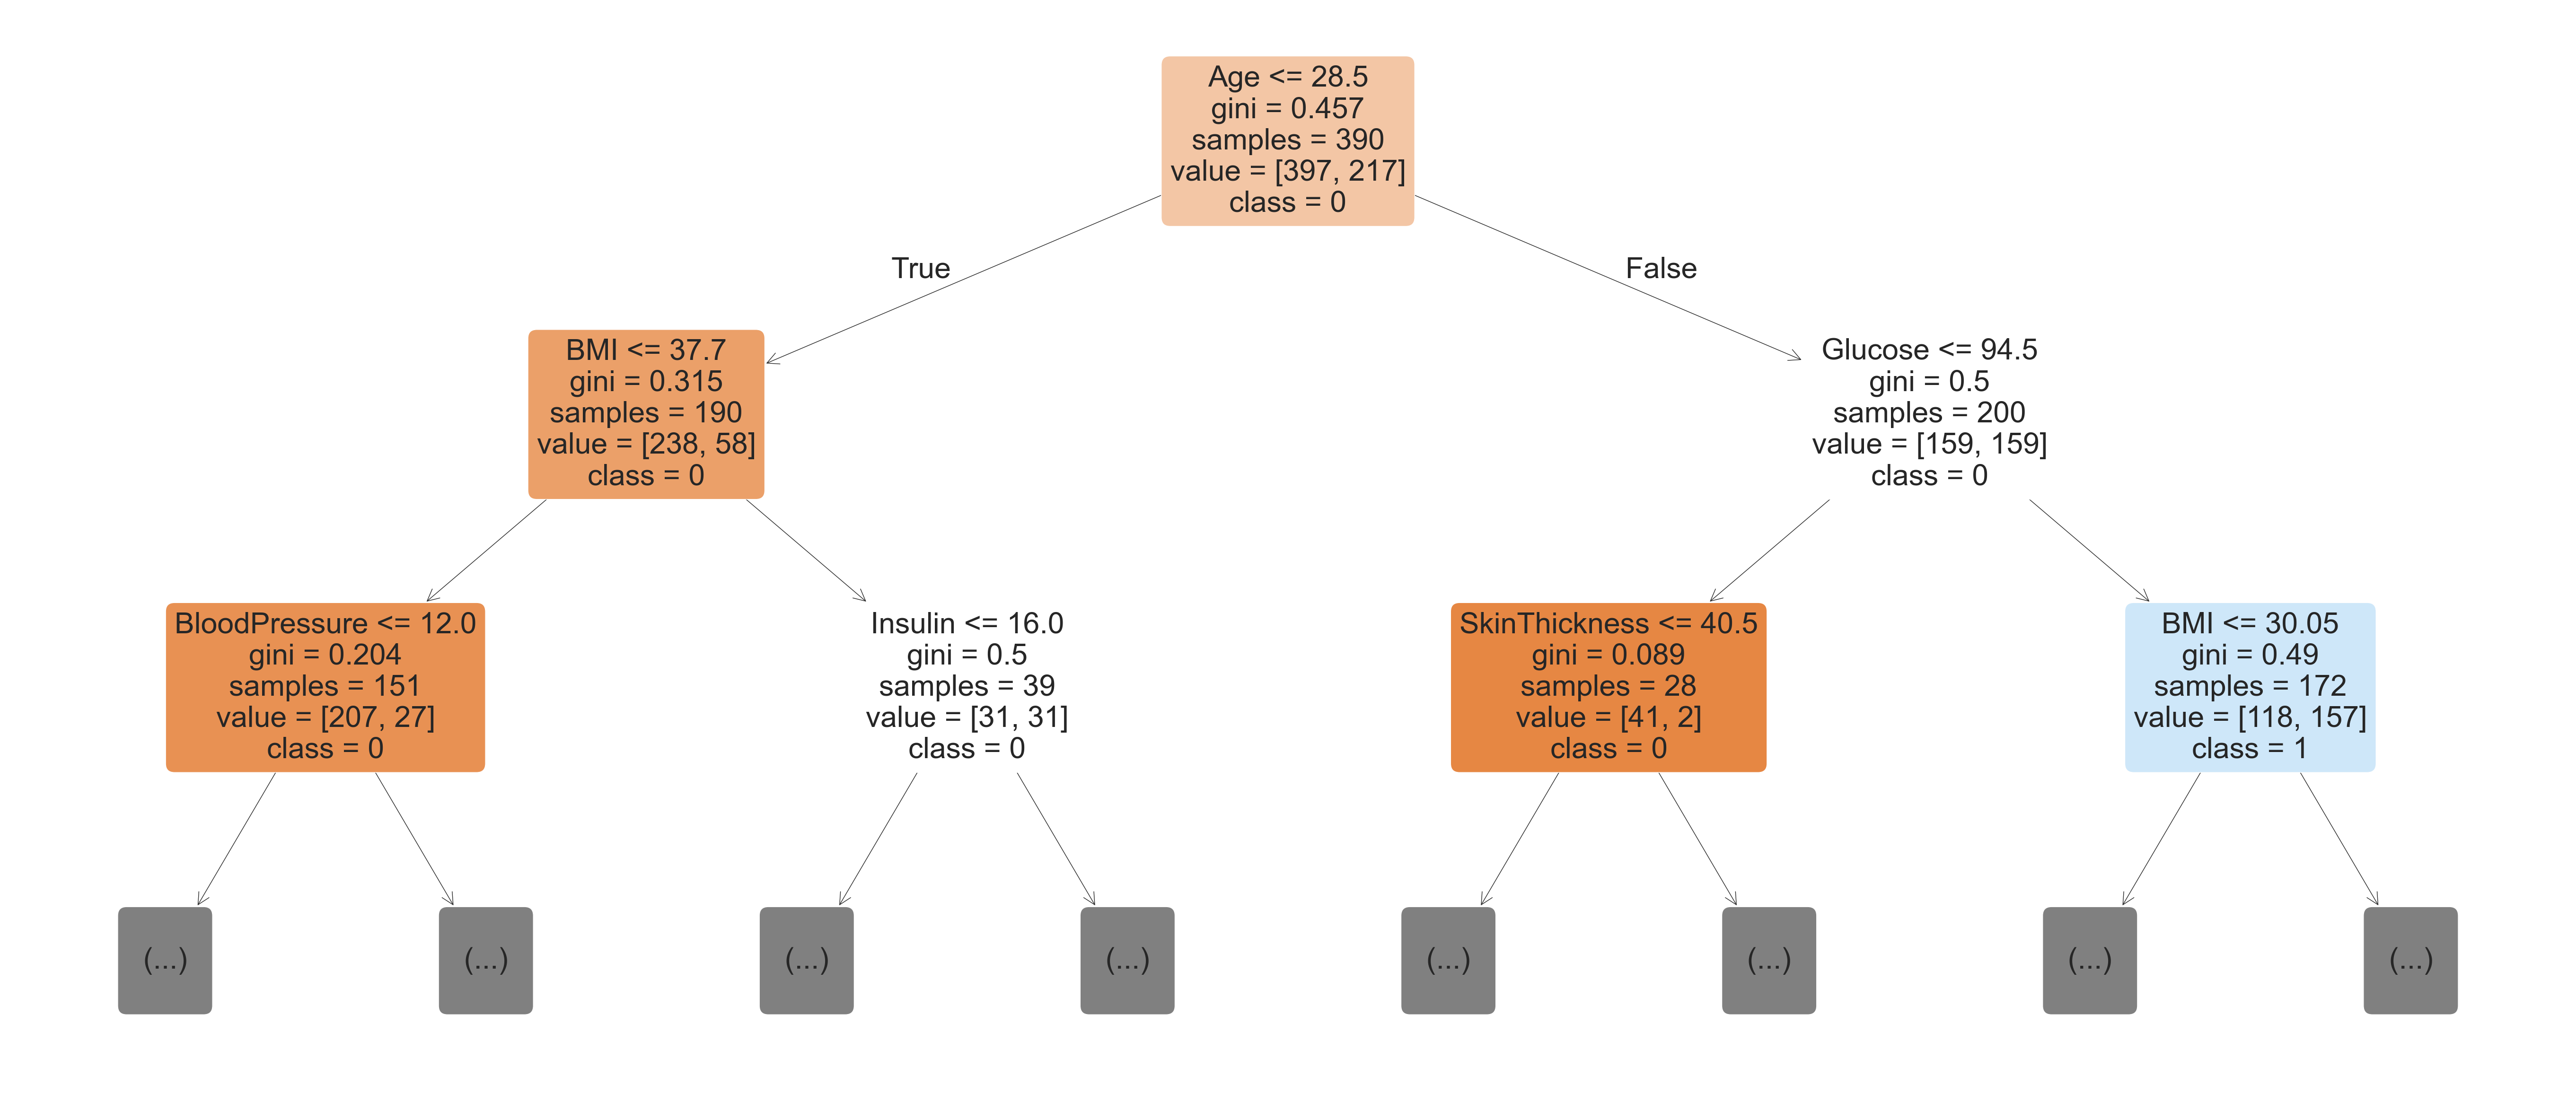

In [49]:
nama_kelas = [str(label) for label in model_RF_imba.classes_]
plt.figure(figsize=(70 , 30))
plot_tree(model_RF_imba.estimators_[0] ,max_depth=2, feature_names=X_train.columns ,filled=True , rounded=True, class_names= nama_kelas)

## Membuat Data Imbalanced menjadi Balance menggunakan Metode Oversampling and undersampling

In [50]:
from sklearn.utils import resample


# Seperate the lowest and lowest classes
lowest_class = df[df["Outcome"] == 1]
highest_class = df[df["Outcome"] == 0]

# Unsample the lowest class
lowest_upsampled = resample(lowest_class, replace=True ,
                            n_samples = len(highest_class) , 
                            random_state=42)

# Combine the upsampled lowest class with the highest class
balanced_df_upsampled = pd.concat([highest_class , lowest_upsampled])

# Alternatively, we can downsample the highest class
highest_downsampled = resample(highest_class , replace= False, 
                              n_samples= len(lowest_class) ,
                              random_state=42)


# Combine the downsampled highest class with lowest class
balanced_df_downsampled = pd.concat([lowest_class , highest_downsampled])

# Verify the balance
print(balanced_df_upsampled["Outcome"].value_counts())
print(balanced_df_downsampled["Outcome"].value_counts())


Outcome
0    500
1    500
Name: count, dtype: int64
Outcome
1    268
0    268
Name: count, dtype: int64


In [51]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have imported necessary libraries and loaded your dataset as 'df'

# Define your input and target columns
input_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target_col = ["Outcome"]

# Extract input features and target variable
X = df[input_cols]
y = df[target_col]

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=input_cols)
resampled_df[target_col] = y_resampled

# Now, you have a resampled DataFrame with balanced classes


<Axes: title={'center': 'Outcome after Oversampling'}, xlabel='Outcome'>

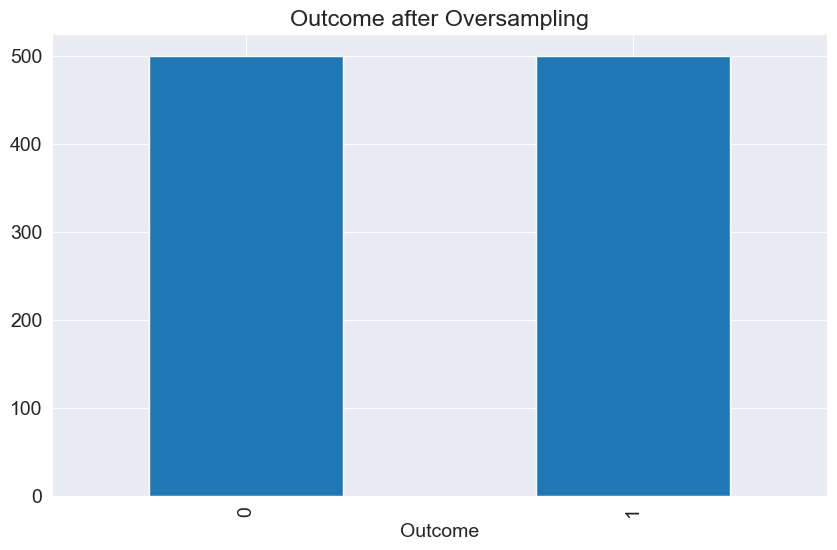

In [52]:
plt.title("Outcome after Oversampling")
balanced_df_upsampled["Outcome"].value_counts().plot(kind = "bar")

In [53]:
# # Create subplots
# fig, figsize = (10,5)

# # Plot for unsampled dataset
# axes[0].set_title("Upsampled Outcome")
# balanced_df_upsampled["Outcome"].value_counts().plot(kind="bar" , ax=axes[0])

# # # Plot for downsampled dataset
# # axes[1].set_title("Downsampled Outcome")
# # balanced_df_downsampled["Outcome"].value_counts().plot(kind="bar", ax=axes[1]) 

# plt.tight_layout()
# plt.show()

Setelah melakukan Reshape menggunakan sklearn reshape , Dataset kita menjadi balance

In [54]:
# Saya akan menggunakan upsampled sebagai data training dan validation 
input_cols_reshape = balanced_df_upsampled[["Glucose","BloodPressure", "SkinThickness", "Insulin" , "BMI" , "DiabetesPedigreeFunction" , "Age" ]]
target_cols_reshape = balanced_df_upsampled[["Outcome"]]

In [55]:
X_train_reshape, X_val_reshape , y_train_reshape, y_val_reshape = train_test_split(input_cols_reshape, target_cols_reshape,test_size=0.2 , random_state=42)

In [56]:
print(y_train_reshape.shape)
print(y_val_reshape.shape)

(800, 1)
(200, 1)


In [57]:
input_cols_reshape.fillna(input_cols_reshape.mean(), inplace=True)



C:\Users\wahyu\AppData\Local\Temp\ipykernel_19404\3431493262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_cols_reshape.fillna(input_cols_reshape.mean(), inplace=True)


In [58]:
print(input_cols_reshape.isnull().sum())

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [59]:
scaler = StandardScaler()
input_cols_scaled = scaler.fit_transform(input_cols_reshape)

In [60]:
# Inisialisasi model Decision Tree
model_reshape = DecisionTreeClassifier(random_state=42, max_depth=4 , min_samples_leaf=3 , min_samples_split=3).fit(X_train_reshape , y_train_reshape)
model_reshape.score(X_val_reshape , y_val_reshape)



0.815

In [61]:
# model_reshape = DecisionTreeClassifier(random_state=42, max_leaf_nodes=64 , min_samples_leaf=15, min_samples_split=12)


In [62]:
model_reshape.fit(X_train_reshape,y_train_reshape)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [63]:
model_reshape.score(X_val_reshape , y_val_reshape)

0.815

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score , KFold
train_preds_reshape = model_reshape.predict(X_train_reshape)

val_preds_reshape = model_reshape.predict(X_val_reshape)

train_accuracy = accuracy_score(y_train_reshape, train_preds_reshape)
val_accuracy= accuracy_score(y_val_reshape, val_preds_reshape)

folds = 10
kf = KFold(n_splits=folds, shuffle=True , random_state=42)
# Cross-validation scores
cv_scores = cross_val_score(model_reshape, X_train_reshape, y_train_reshape, cv=kf)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

# Calculate precision
precision = precision_score(y_val_reshape, val_preds_reshape)

# Calculate recall
recall = recall_score(y_val_reshape, val_preds_reshape)

# Calculate F1-score
f1 = f1_score(y_val_reshape, val_preds_reshape)

# Calculate ROC-AUC score (if applicable for binary classification)
roc_auc = roc_auc_score(y_val_reshape, val_preds_reshape)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", mean_cv_score)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

cm = confusion_matrix(y_val_reshape, val_preds_reshape)
cm = confusion_matrix(y_train_reshape, train_preds_reshape)
print("confusion_matrix")
print(cm)

Training Accuracy: 0.8125
Validation Accuracy: 0.815
Precision: 0.7863247863247863
Recall: 0.8846153846153846
Mean Cross-Validation Score: 0.76875
F1-score: 0.832579185520362
ROC-AUC Score: 0.8120993589743588
confusion_matrix
[[294 110]
 [ 40 356]]


In [65]:
train_preds_reshape
pd.Series.value_counts(train_preds_reshape)

1    466
0    334
Name: count, dtype: int64

In [66]:
val_preds_reshape
pd.Series.value_counts(val_preds_reshape)

1    117
0     83
Name: count, dtype: int64

In [67]:
model_reshape.classes_

array([0, 1], dtype=int64)

[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.5\nsamples = 800\nvalue = [404, 396]\nclass = 0'),
 Text(0.25, 0.625, 'Age <= 28.5\ngini = 0.429\nsamples = 463\nvalue = [319, 144]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'SkinThickness <= 35.5\ngini = 0.216\nsamples = 227\nvalue = [199, 28]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'BMI <= 26.95\ngini = 0.5\nsamples = 236\nvalue = [120, 116]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.377\nsamples = 337\nvalue = [85.0, 252.0]\nclass = 1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 22.5\ngini = 0.499\nsamples = 82\nvalue = [39, 43]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Glucose <= 154.5\ngini = 0.296\nsamples = 255\nvalue = [46, 209]\nclass = 1'),
 Text(0.8125, 0.125, 

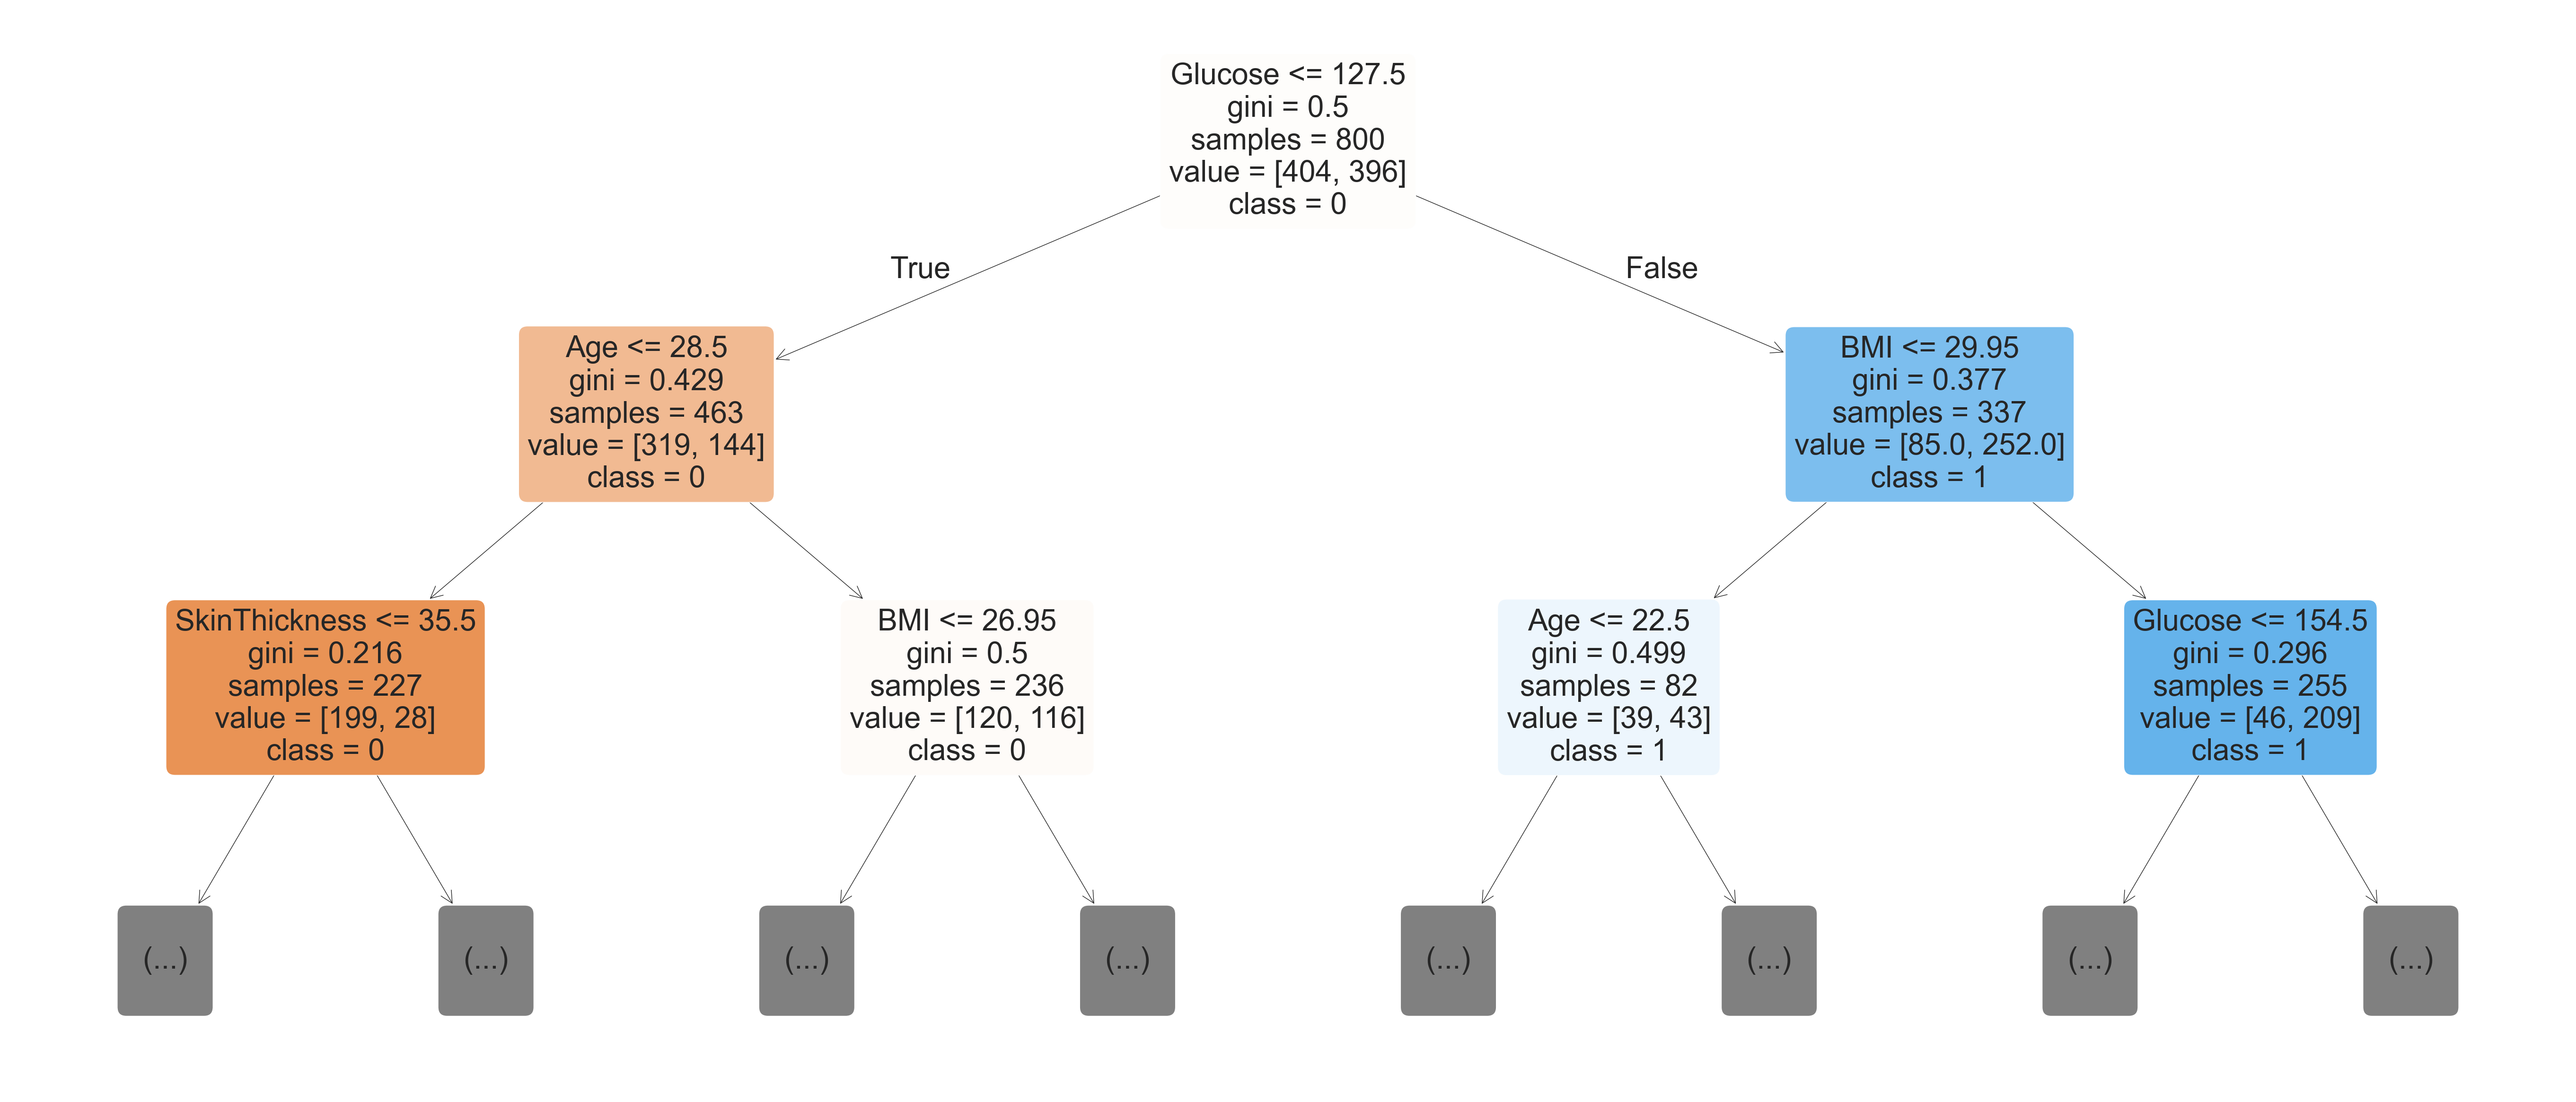

In [68]:
class_names_reshape = [str(label) for label in model_reshape.classes_]

plt.figure(figsize=(70 , 30))
plot_tree(model_reshape ,max_depth=2, feature_names=X_train_reshape.columns ,filled=True , rounded=True, class_names= class_names_reshape)

Lets Check the Tree Depth

In [69]:
model_reshape.tree_.max_depth

4

We can also display the tree as text , which can be easier to follow for deeper trees.

In [70]:
tree_text_reshape = export_text(model_reshape , feature_names=list(X_train_reshape.columns))
print(tree_text_reshape[:5000])

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- SkinThickness <= 35.50
|   |   |   |--- BloodPressure <= 79.00
|   |   |   |   |--- class: 0
|   |   |   |--- BloodPressure >  79.00
|   |   |   |   |--- class: 0
|   |   |--- SkinThickness >  35.50
|   |   |   |--- BMI <= 45.40
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  45.40
|   |   |   |   |--- class: 1
|   |--- Age >  28.50
|   |   |--- BMI <= 26.95
|   |   |   |--- BMI <= 21.25
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  21.25
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.95
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  99.50
|   |   |   |   |--- class: 1
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Age <= 22.50
|   |   |   |--- class: 0
|   |   |--- Age >  22.50
|   |   |   |--- Age <= 61.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  61.00
|   |   |   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 154.50
|   |

In [71]:
model_reshape.feature_importances_

array([0.52117815, 0.02817833, 0.02764939, 0.01183452, 0.17202073,
       0.        , 0.23913888])

In [72]:
importance_df = pd.DataFrame({
    'feature' : X_train_reshape.columns,
    'importance' : model_reshape.feature_importances_
}).sort_values('importance',ascending=False)

In [73]:
importance_df.head()

,feature,importance
0,Glucose,0.521178
6,Age,0.239139
4,BMI,0.172021
1,BloodPressure,0.028178
2,SkinThickness,0.027649


In [74]:
def max_depth_error(md) :
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train_reshape, y_train_reshape)
    train_acc = 1 - model.score(X_train_reshape,y_train_reshape)
    val_acc = 1 - model.score(X_val_reshape,y_val_reshape)
    return {'Max Depth': md , 'Training Error' : train_acc , 'Validation Error' : val_acc}

In [75]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1 , 13)])

CPU times: total: 141 ms
Wall time: 149 ms


In [76]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.28625,0.320
1,2,0.28625,0.320
2,3,0.23500,0.255
3,4,0.18375,0.180
4,5,0.16875,0.215
5,6,0.13375,0.215
6,7,0.09125,0.200
7,8,0.05875,0.210
8,9,0.03625,0.200
9,10,0.02000,0.195


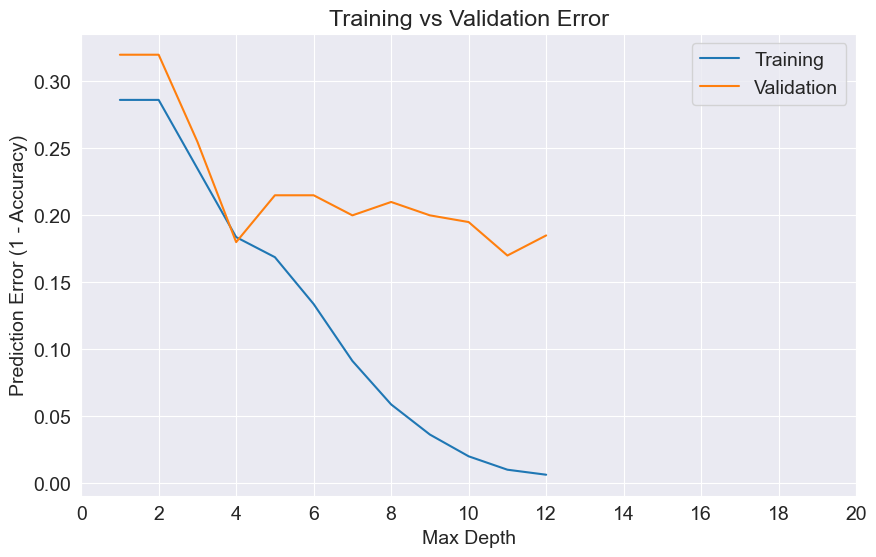

In [77]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel("Max Depth")
plt.ylabel("Prediction Error (1 - Accuracy)")
plt.legend(['Training' , 'Validation'])

In [78]:
model_reshape.tree_.max_depth

4

### Lets Build Random Forest for Balanced Data

In [79]:

# Flatten y_train_reshape
y_train_flat = np.ravel(y_train_reshape)
y_val_flat = np.ravel(y_val_reshape)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
}

# Initialize RandomForestClassifier
model_RF = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_reshape, y_train_flat)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.83625


In [82]:
best_params = grid_search.best_params_
model_RF = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)

In [83]:
model_RF.fit(X_train_reshape , y_train_flat)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [84]:
model_RF.score(X_train_reshape , y_train_flat) , model_RF.score(X_val_reshape , y_val_flat )

(0.95875, 0.88)

In [85]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
y_train_pred = model_RF.predict(X_train_reshape)
y_val_pred = model_RF.predict(X_val_reshape)

# Training metrics
train_accuracy = accuracy_score(y_train_flat, y_train_pred)
train_precision = precision_score(y_train_flat, y_train_pred)
train_recall = recall_score(y_train_flat, y_train_pred)
train_f1 = f1_score(y_train_flat, y_train_pred)
train_roc_auc = roc_auc_score(y_train_flat, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_flat, y_train_pred)

# Validation metrics
val_accuracy = accuracy_score(y_val_flat, y_val_pred)
val_precision = precision_score(y_val_flat, y_val_pred)
val_recall = recall_score(y_val_flat, y_val_pred)
val_f1 = f1_score(y_val_flat, y_val_pred)
val_roc_auc = roc_auc_score(y_val_flat, y_val_pred)
val_conf_matrix = confusion_matrix(y_val_flat, y_val_pred)

# Cross Validation
folds = 10
kf=KFold(n_splits=folds , shuffle=True, random_state=42)
cv_scores = cross_val_score(model_RF,X_train_reshape,y_train_flat,cv=kf)
mean_cv_score = np.mean(cv_scores)
# Print results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Training Recall:", train_recall)
print("Validation Recall:", val_recall)
print("Training F1-score:", train_f1)
print("Validation F1-score:", val_f1)
print("Training ROC-AUC Score:", train_roc_auc)
print("Validation ROC-AUC Score:", val_roc_auc)
print("Accuracy per fold", kf)
print("Mean Cross Validation Score:", mean_cv_score)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Validation Confusion Matrix:\n", val_conf_matrix)



Training Accuracy: 0.95875
Validation Accuracy: 0.88
Training Precision: 0.9373493975903614
Validation Precision: 0.8636363636363636
Training Recall: 0.9823232323232324
Validation Recall: 0.9134615384615384
Training F1-score: 0.9593094944512947
Validation F1-score: 0.8878504672897196
Training ROC-AUC Score: 0.9589833983398339
Validation ROC-AUC Score: 0.8786057692307692
Mean Cross Validation Score: 0.8287500000000001
Training Confusion Matrix:
 [[378  26]
 [  7 389]]
Validation Confusion Matrix:
 [[81 15]
 [ 9 95]]


In [86]:

# Konversi array NumPy ke DataFrame pandas
X_train_df = pd.DataFrame(X_train_reshape)
y_train_df = pd.DataFrame(y_train_flat, columns=['target'])
X_val_df = pd.DataFrame(X_val_reshape)
y_val_df = pd.DataFrame(y_val_flat, columns=['target'])

# Simpan DataFrame ke file CSV
X_train_df.to_csv('X_train.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
X_val_df.to_csv('X_val.csv', index=False)
y_val_df.to_csv('y_val.csv', index=False)


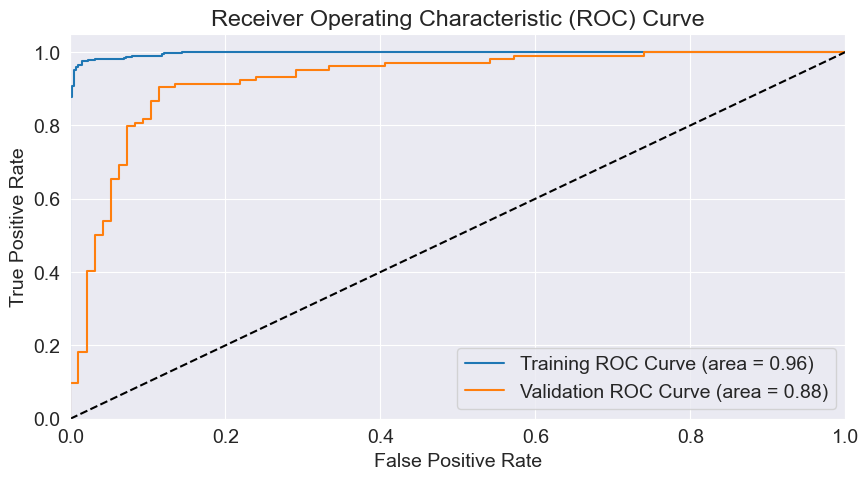

In [87]:
# Plot ROC Curve
train_probs = model_RF.predict_proba(X_train_reshape)[:, 1]
val_probs = model_RF.predict_proba(X_val_reshape)[:, 1]

train_fpr, train_tpr,_ = roc_curve(y_train_reshape, train_probs)
val_fpr, val_tpr, _ = roc_curve(y_val_reshape, val_probs)
plt.figure(figsize=(10 ,5))
plt.plot(train_fpr, train_tpr, label='Training ROC Curve (area = %0.2f)' % train_roc_auc)
plt.plot(val_fpr, val_tpr, label='Validation ROC Curve (area = %0.2f)' % val_roc_auc)
plt.plot([0 , 1] , [0 , 1] ,'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[Text(0.5, 0.875, 'BMI <= 26.75\ngini = 0.5\nsamples = 506\nvalue = [408.911, 390.909]\nclass = 0'),
 Text(0.25, 0.625, 'SkinThickness <= 4.0\ngini = 0.188\nsamples = 103\nvalue = [146.535, 17.172]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BloodPressure <= 83.0\ngini = 0.298\nsamples = 41\nvalue = [54.455, 12.121]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Insulin <= 112.5\ngini = 0.099\nsamples = 62\nvalue = [92.079, 5.051]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Age <= 30.5\ngini = 0.485\nsamples = 403\nvalue = [262.376, 373.737]\nclass = 1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'DiabetesPedigreeFunction <= 0.194\ngini = 0.479\nsamples = 189\nvalue = [179.208, 118.182]\nclass = 0'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'BloodPressure <= 53.0\ngini

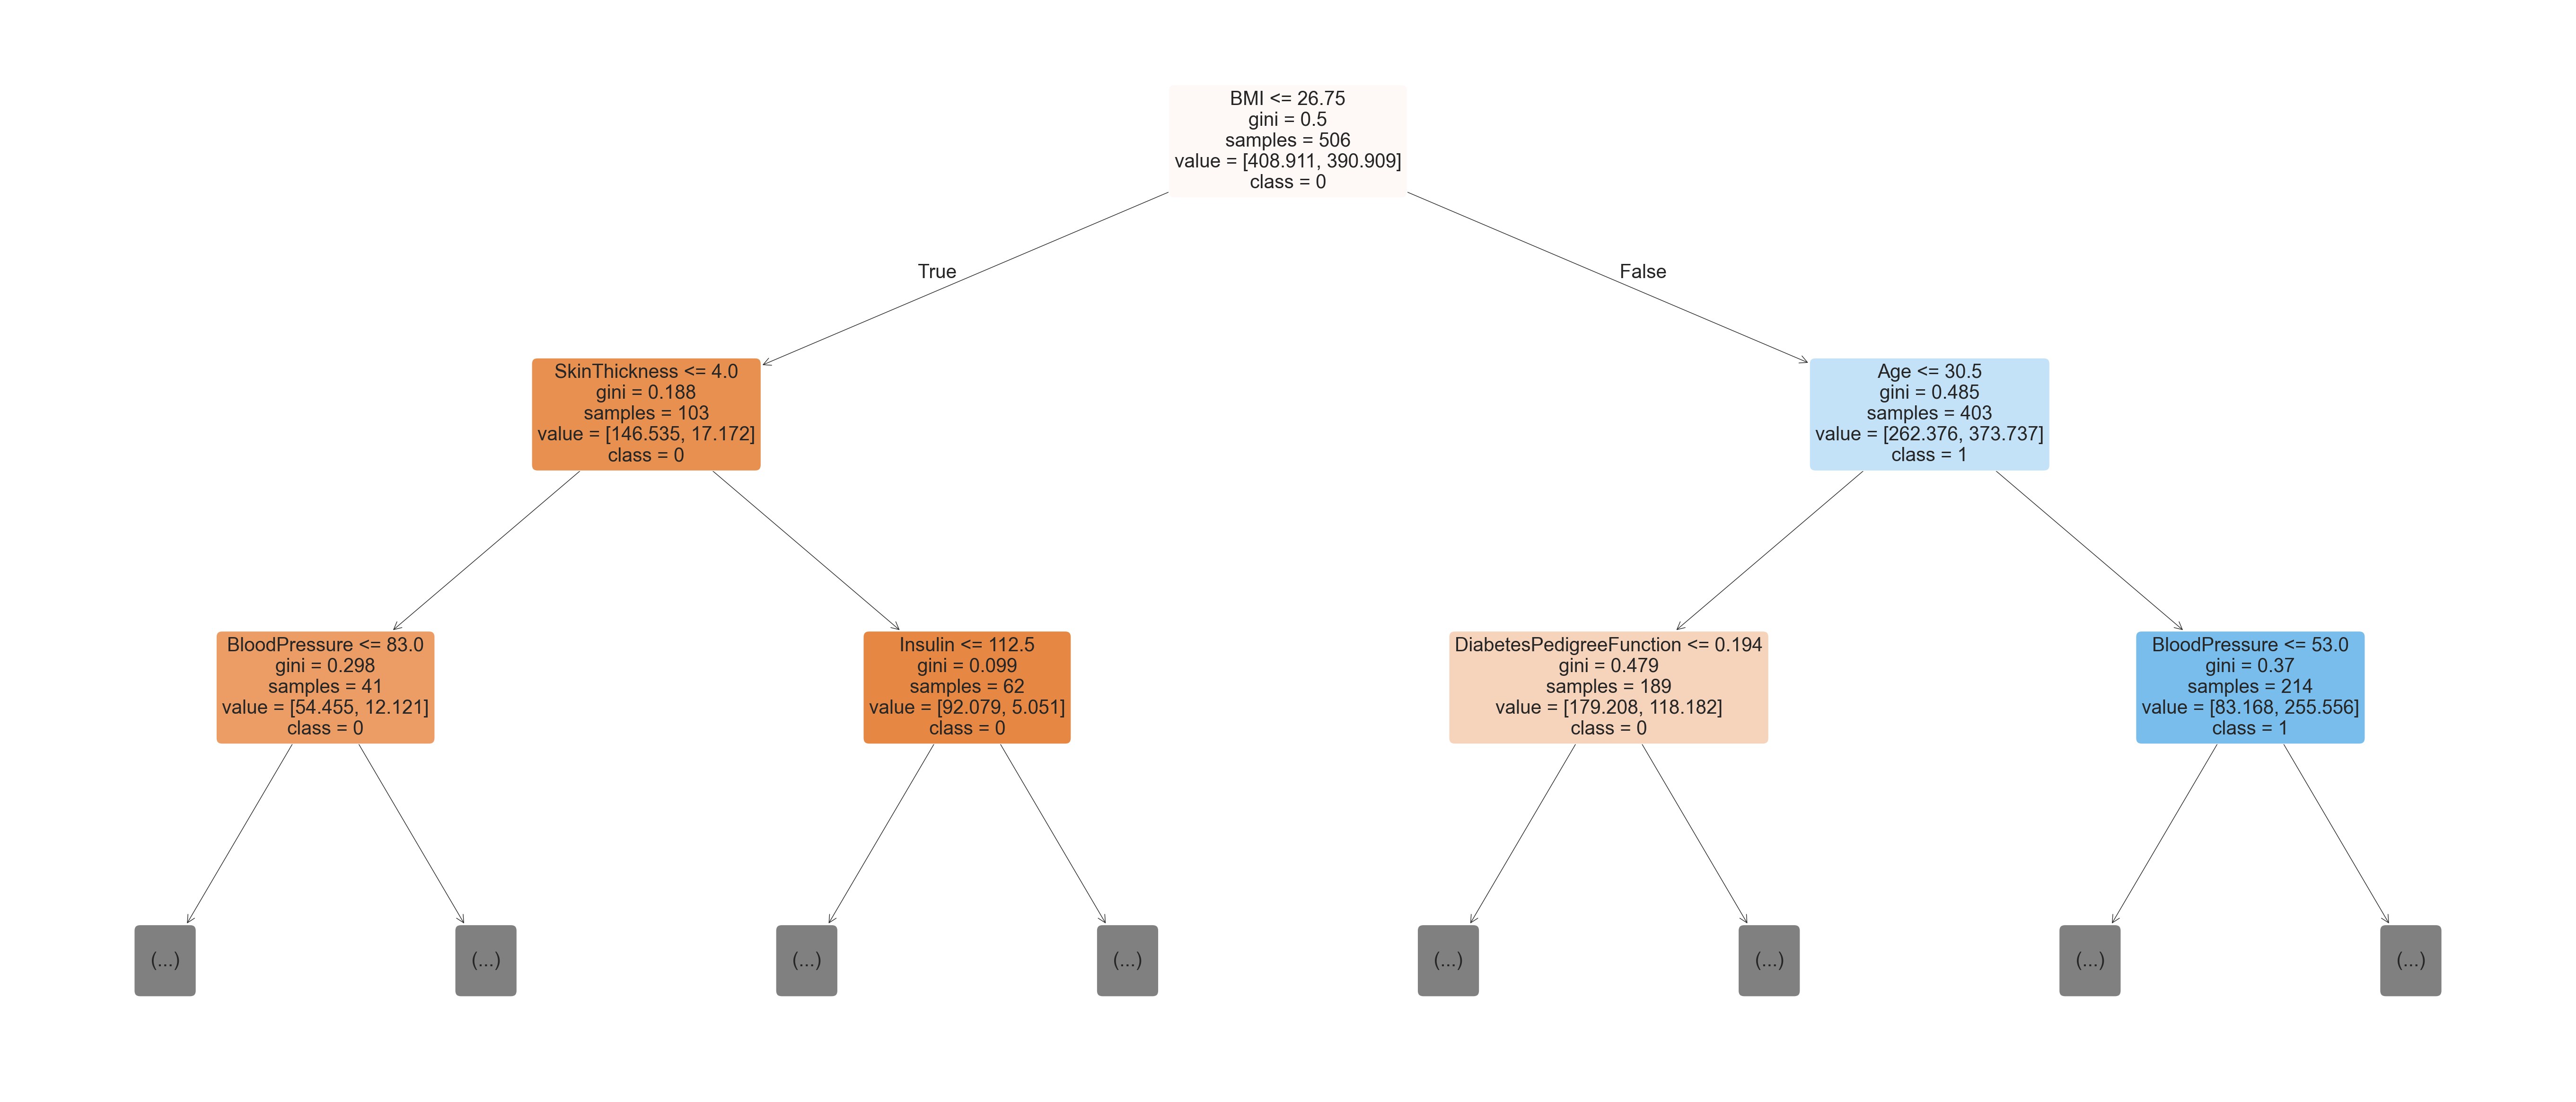

In [88]:
nama_kelas = [str(label) for label in model_RF.classes_]
plt.figure(figsize=(70 , 30))
plot_tree(model_RF.estimators_[0] ,max_depth=2, feature_names=X_train_reshape.columns ,filled=True , rounded=True, class_names= nama_kelas)

In [89]:
importance_df = pd.DataFrame({
    'feature' : X_train_reshape.columns,
    'importance' : model_RF.feature_importances_
}).sort_values('importance' , ascending=True)

In [90]:
importance_df.head()

,feature,importance
2,SkinThickness,0.073751
3,Insulin,0.076109
1,BloodPressure,0.084156
5,DiabetesPedigreeFunction,0.110024
6,Age,0.172689


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

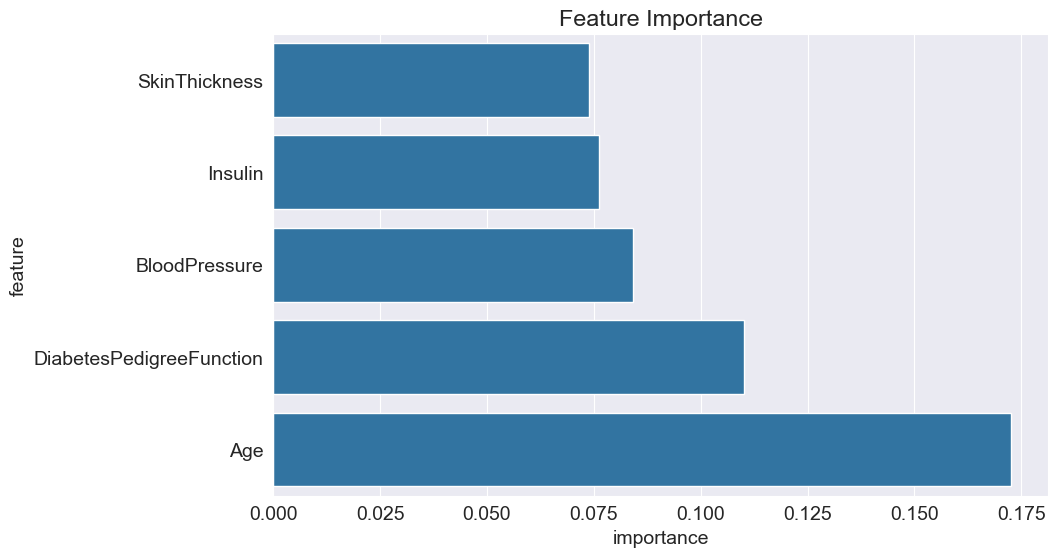

In [91]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(), x='importance' , y="feature")

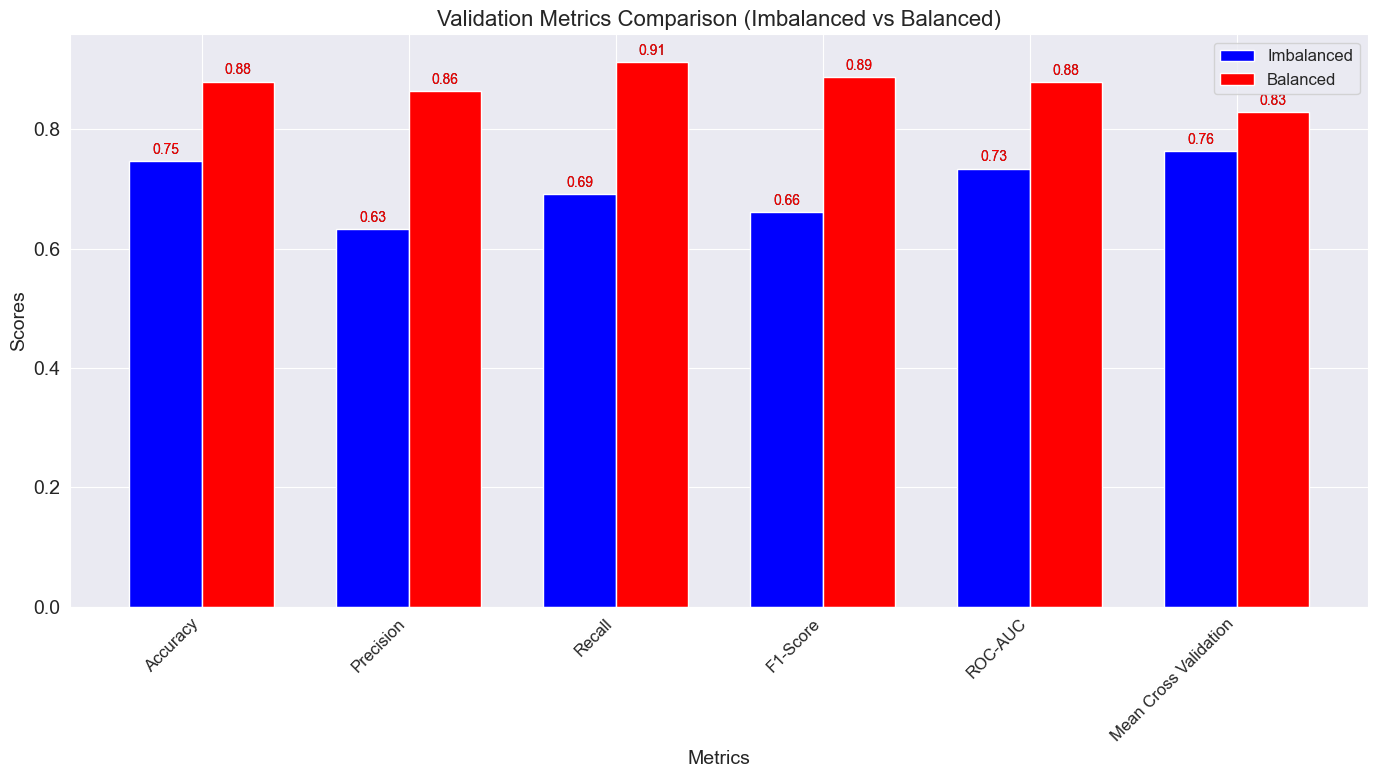

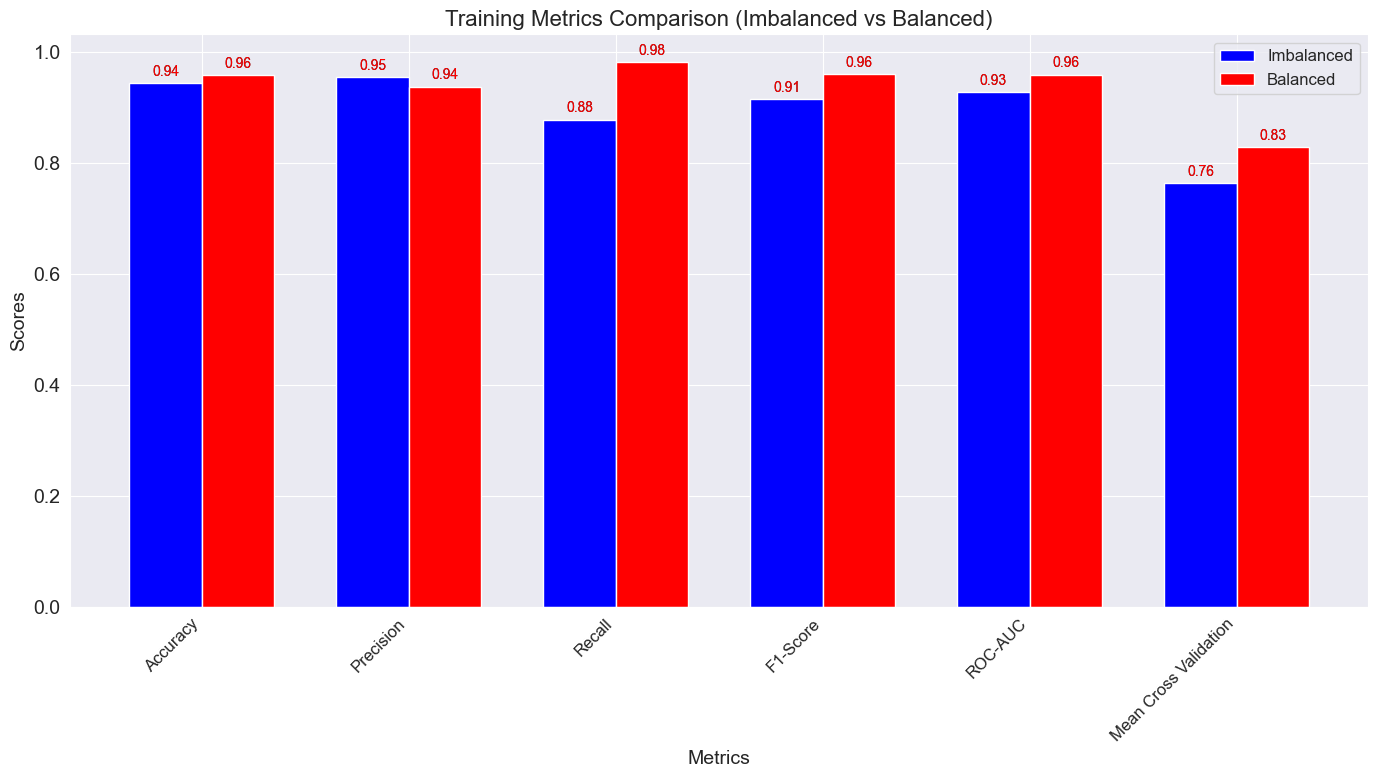

In [92]:
metrics = ['Accuracy' , 'Precision' , 'Recall', 'F1-Score' , 'ROC-AUC' , 'Mean Cross Validation']
# Validation Metrics Values
val_imbalanced_values = [val_accuracy_imba, val_precision_imba, val_recall_imba, val_f1_imba, val_roc_auc_imba, mean_cv_score_imba]
val_balanced_values = [val_accuracy , val_precision, val_recall, val_f1, val_roc_auc, mean_cv_score]

# Training Metrics Values
imbalanced_values = [ train_accuracy_imba , train_precision_imba, train_recall_imba, train_f1_imba, train_roc_auc_imba, mean_cv_score_imba]
balanced_values = [train_accuracy , train_precision, train_recall, train_f1, train_roc_auc, mean_cv_score]
x = np.arange(len(metrics))
bar_width = 0.35

# Function to add labels
def add_labels(bars,values):
    for bar, value in zip(bars,values):
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2 , height), 
                     xytext=(0 , 3), 
                     textcoords='offset points', 
                     ha='center', va='bottom', 
                     fontsize=10)
        plt.annotate(f'{value:.2f}', 
                     xy=(bar.get_x() + bar.get_width()/2, value), 
                     xytext=(0,3), 
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color="red",
                     fontsize=10)


# For Validation
plt.figure(figsize=(14,8))
bars1 = plt.bar(x - bar_width/2, val_imbalanced_values, bar_width, label="Imbalanced", color="blue")
bars2 = plt.bar(x + bar_width/2, val_balanced_values, bar_width, label="Balanced", color="r")

plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Validation Metrics Comparison (Imbalanced vs Balanced)', fontsize=16)
plt.xticks(x,metrics,rotation=45,ha="right", fontsize=12)
plt.legend(fontsize=12)

add_labels(bars1, val_imbalanced_values)
add_labels(bars2, val_balanced_values)

plt.tight_layout()
plt.savefig('validation_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# For Training
plt.figure(figsize=(14,8))
bars1 = plt.bar(x - bar_width/2, imbalanced_values, bar_width, label="Imbalanced", color="blue")
bars2 = plt.bar(x + bar_width/2, balanced_values, bar_width, label="Balanced", color="r")

plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Training Metrics Comparison (Imbalanced vs Balanced)', fontsize=16)
plt.xticks(x,metrics,rotation=45,ha="right", fontsize=12)
plt.legend(fontsize=12)

add_labels(bars1, imbalanced_values)
add_labels(bars2, balanced_values)

plt.tight_layout()
plt.savefig('training_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



In [1]:
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({
    "class": [0] * 56 + [1] * 130
})

def gini_index(data):
    """
    Calculates the Gini impurity for a binary classification problem.

    Args:
        data (DataFrame): A DataFrame containing the class labels.

    Returns:
        float: The Gini impurity.
    """
    class_counts = data['class'].value_counts().to_dict()
    total_samples = len(data)
    probabilities = {c: count / total_samples for c, count in class_counts.items()}
    gini = 1 - sum(p**2 for p in probabilities.values())
    return gini

# Calculate and print the Gini index
gini = gini_index(data)
print("Gini index:", gini)


Gini index: 0.42085790264770484


In [94]:
import pickle

# Menyimpan model yang sudah dilatih
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_RF, file)
